In [264]:
import pandas as pd
import dateutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [265]:
df = pd.read_csv('Created CSVs/all_seins_all_data_standard_dates.csv').drop('Unnamed: 0', axis=1)

In [266]:
df = df[['Date', '# Hauls', 'Common Name', 'Quantity']]

In [267]:
df = df.dropna()

In [268]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [269]:
set(df[df["# Hauls"].str.contains(r'\d') == False]['# Hauls'])

{'?', 'Many', 'unknown'}

In [270]:
df = df[df["# Hauls"].str.contains(r'\d') == True]

In [271]:
import re
hauls = []
for haul in df['# Hauls']:
    first_num  = re.search(r'\d+', haul).group()
    hauls.append(first_num)

In [272]:
df['# Hauls'] = [int(x) for x in hauls]

In [273]:
df = df.replace(to_replace=['TMTC','Too Many To Count'], value= '30')

In [274]:
df = df.replace(to_replace="unknown", value= np.nan).dropna()

In [275]:
quants = []
for quant in df['Quantity']:
    first_num  = re.search(r'\d+', quant).group()
    quants.append(first_num)

In [276]:
df['Quantity'] = [int(x) for x in quants]

In [277]:
df['Common Name'] = [str(x) for x in df['Common Name']]

In [278]:
hauls = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(1))

In [279]:
dates = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(0))

In [280]:
hauls_df = df.groupby(['Date', '# Hauls'], as_index=False).sum()

In [281]:
hauls_data = hauls_df[['# Hauls', 'Quantity']]

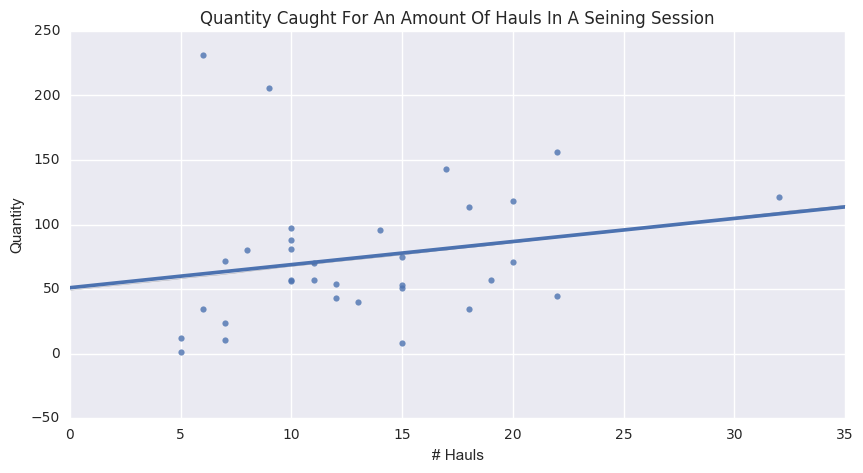

In [282]:
ax = sns.regplot(x="# Hauls", y="Quantity", ci = False,data=hauls_df)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session")

In [283]:
# ditch comb jellies

In [284]:
df['Common Name'] = [x.lower() for x in list(df['Common Name'])]

In [285]:
name_changes = {'ctenophore':'comb jelly','comb jellies ctenophores': 'comb jelly', 'comb jellies': 'comb jelly', '20 ctenophores': 'comb jelly'}

In [286]:
df = df.replace(name_changes)

In [287]:
df_no_jellies = df[df['Common Name'] != 'comb jelly']

In [288]:
hauls_df = df_no_jellies.groupby(['Date', '# Hauls'], as_index=False).sum()

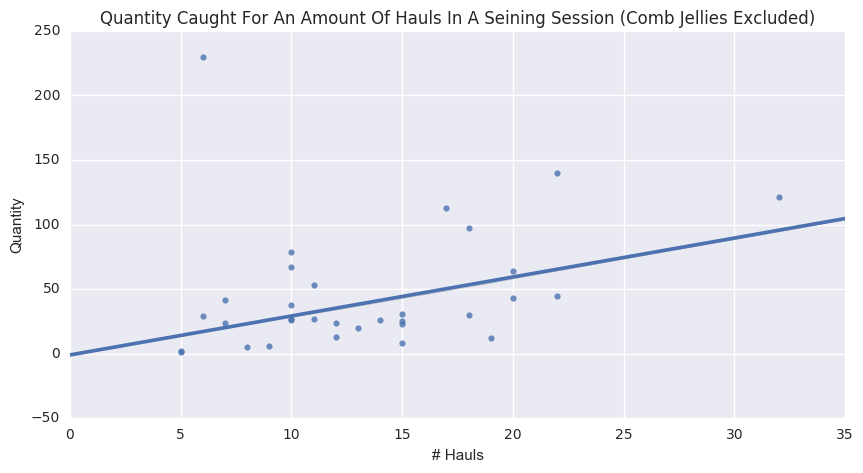

In [289]:
ax = sns.regplot(x="# Hauls", y="Quantity", data=hauls_df, order = 1, ci = False, robust = True)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)")

In [290]:
df["Year"] = df["Date"].dt.year
df_no_jellies["Year"] = df_no_jellies["Date"].dt.year

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [291]:
hauls = df.groupby(["Date", "# Hauls", "Year"], as_index=False).sum()

In [292]:
hauls = list(hauls.groupby("Year").sum()["# Hauls"])

In [293]:
hauls

[149, 135, 147]

In [294]:
df_by_year = df.groupby(["Year"], as_index=False).sum()
df_no_jellies_by_year = df_no_jellies.groupby(["Year"], as_index=False).sum()

In [295]:
hauls

[149, 135, 147]

In [296]:
df_by_year["# Hauls"] = hauls
df_no_jellies_by_year["# Hauls"] = hauls

In [297]:
df_by_year

,Year,# Hauls,Quantity
0,2016,149,855
1,2017,135,664
2,2018,147,939


In [298]:
df_no_jellies_by_year["Catch Per Unit Effort"] =  df_no_jellies_by_year["Quantity"] / df_no_jellies_by_year["# Hauls"]

In [299]:
df_by_year["Catch Per Unit Effort"] = df_by_year["Quantity"] / df_by_year["# Hauls"]

In [300]:
df_by_year

,Year,# Hauls,Quantity,Catch Per Unit Effort
0,2016,149,855,5.738255
1,2017,135,664,4.918519
2,2018,147,939,6.387755


In [301]:
df_no_jellies_by_year

,Year,# Hauls,Quantity,Catch Per Unit Effort
0,2016,149,253,1.697987
1,2017,135,422,3.125926
2,2018,147,816,5.551020


In [302]:
sns.set()

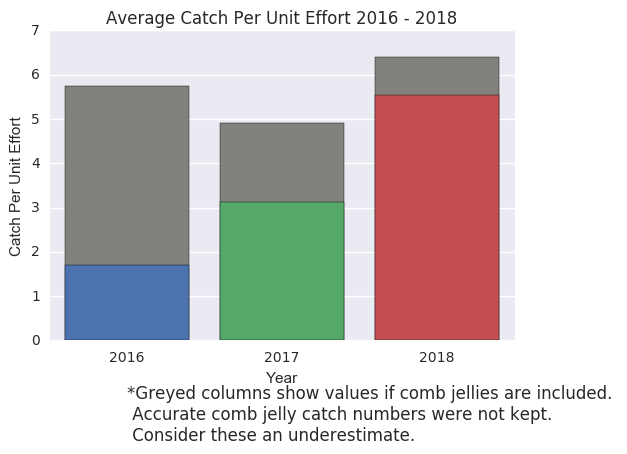

In [318]:
#df, df_no_jellies
ax = sns.barplot(x="Year", y="Catch Per Unit Effort", data=df_by_year,color = 'yellow',saturation =0.01)
ax = sns.barplot(x="Year", y="Catch Per Unit Effort", data=df_no_jellies_by_year, saturation = 1)
ax.set_title('Average Catch Per Unit Effort 2016 - 2018')
ax.text(0,-2.25,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Recent Average Catch Per Haul (comb jelly shadows)', bbox_inches='tight')

In [304]:
dates = list(set(df['Date']))

In [305]:
species_count_dict = {}
for date in dates:
    species_count_dict[date] = df[df["Date"] == date].shape[0]

In [306]:
df["Species_Count"] = [species_count_dict[x] for x in df['Date']]

In [307]:
df.tail()

,Date,# Hauls,Common Name,Quantity,Year,Species_Count
1022,2018-10-06,14,long clawed hermit crab,5,2018,7
1023,2018-10-18,7,flounder,1,2018,4
1024,2018-10-18,7,striped bass,8,2018,4
1025,2018-10-18,7,silverside,13,2018,4
1026,2018-10-18,7,herring,2,2018,4


In [308]:
hauls_species_df = df.groupby(['Date', '# Hauls', 'Species_Count'], as_index=False).sum()

In [309]:
hauls_species_df.tail()

,Date,# Hauls,Species_Count,Quantity,Year
28,2018-09-20,22,15,156,30270
29,2018-09-21,18,11,114,22198
30,2018-10-05,11,12,70,24216
31,2018-10-06,14,7,96,14126
32,2018-10-18,7,4,24,8072


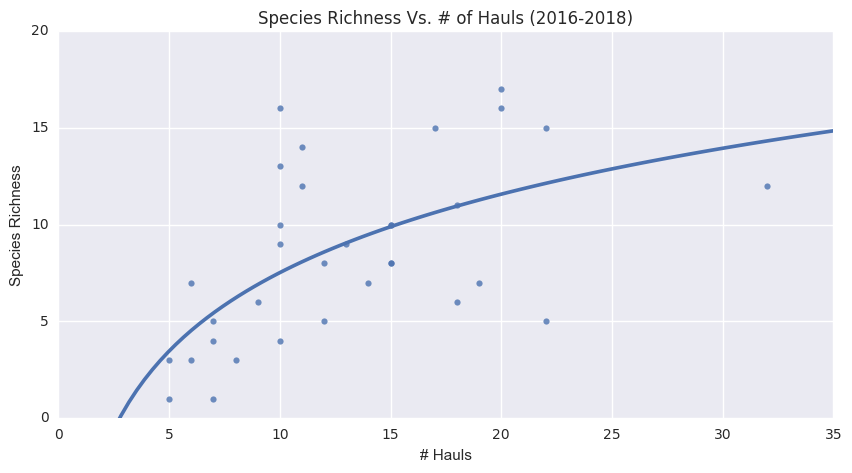

In [310]:
ax = sns.regplot(x="# Hauls", y="Species_Count", data=hauls_species_df, ci = None, logx =True)
ax.set_title("Species Richness Vs. # of Hauls (2016-2018)")
ax.set_ylim(0)
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.set_ylabel('Species Richness')
ax.figure.savefig("Graphs/Number of Species Caught For Amount of Hauls In A Seining Session")

In [311]:
hauls_species_df["Year"] = hauls_species_df["Date"].dt.year

In [312]:
richness_by_year = hauls_species_df.groupby("Year", as_index=False).sum()

In [313]:
richness_by_year

,Year,# Hauls,Species_Count,Quantity
0,2016,149,90,855
1,2017,135,100,664
2,2018,147,90,939


# Danger:Number of hauls per year not currently matching up

In [314]:
richness_by_year["Species Richness Per Unit Effort"] = 1.0*richness_by_year["Species_Count"] / richness_by_year["# Hauls"]

In [315]:
richness_by_year

,Year,# Hauls,Species_Count,Quantity,Species Richness Per Unit Effort
0,2016,149,90,855,0.604027
1,2017,135,100,664,0.740741
2,2018,147,90,939,0.612245


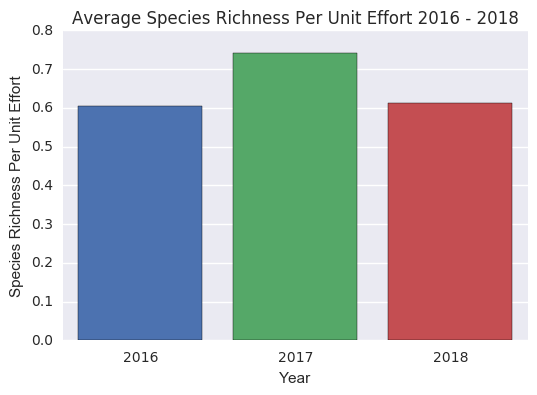

In [319]:
#ax = sns.barplot(x="Year", y="Species Richness Per Unit Effort", data=df_by_year,color = 'yellow',saturation =0.01)
ax = sns.barplot(x="Year", y="Species Richness Per Unit Effort", data=richness_by_year, saturation = 1)
ax.set_title('Average Species Richness Per Unit Effort 2016 - 2018')
#ax.text(0,-0.25,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Recent Average Species Richness Per Haul', bbox_inches='tight')

In [65]:
df["Year"] = df['Date'].dt.year

In [66]:
df.groupby(["Year"], as_index=False).mean()

,Year,# Hauls,Quantity,Species_Count
0,2016,13.700000,9.500000,9.111111
1,2017,14.030000,6.640000,11.840000
2,2018,16.522222,10.433333,11.444444


In [97]:
#df["Species Richness Per Haul"] = 1.0*df["Species_Count"]/df["# Hauls"] 

# Amount of species caught per haul based on time of the year

In [322]:
df["Species Richness Per Unit Effort"] =  1.0*df["Species_Count"] / df["# Hauls"]

In [326]:
df["Day of the Year"] = df["Date"].dt.dayofyear

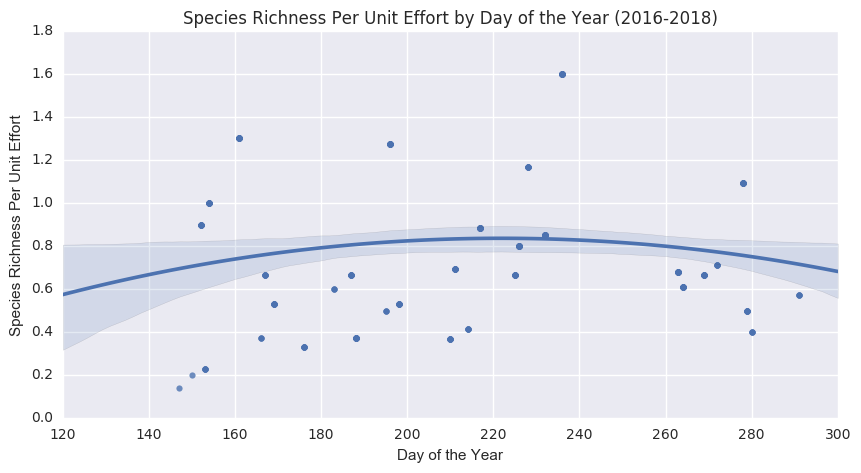

In [334]:
ax = sns.regplot(x="Day of the Year", y="Species Richness Per Unit Effort", data=df, order= 2)
ax.set_title("Species Richness Per Unit Effort by Day of the Year (2016-2018)")
ax.set_ylim(0)
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Species Richness Per Unit Effort By Day Of Year")